# Charaf_Lachouri_Final_Project

# Using several machine learning algorithms to Classify Wine Classes based on couple wine's pharmaceutical features using the Wine_Dataset.csv Dataset.

# Dataset Information

Source:

Original Owners:

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

Donor:

Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au
    
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline

# 1. Classification Using the K-NN machine learning algorithm

Importing Packages and Loading Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

Loading Data and Exploratory Analysis

In [2]:
data = pd.read_csv('Wine_Dataset.csv')

# Summarize the Dataset

# shape
print(data.shape)

# head
print(data.head(20))

(178, 14)
    Classes  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0         1    14.23        1.71  2.43               15.6        127   
1         1    13.20        1.78  2.14               11.2        100   
2         1    13.16        2.36  2.67               18.6        101   
3         1    14.37        1.95  2.50               16.8        113   
4         1    13.24        2.59  2.87               21.0        118   
5         1    14.20        1.76  2.45               15.2        112   
6         1    14.39        1.87  2.45               14.6         96   
7         1    14.06        2.15  2.61               17.6        121   
8         1    14.83        1.64  2.17               14.0         97   
9         1    13.86        1.35  2.27               16.0         98   
10        1    14.10        2.16  2.30               18.0        105   
11        1    14.12        1.48  2.32               16.8         95   
12        1    13.75        1.73  2.41               1

Statistical Summary

In [3]:
# descriptions
print(data.describe())

          Classes     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

In [4]:
#Counts of classes in data
data['Classes'].value_counts()

2    71
1    59
3    48
Name: Classes, dtype: int64

In [5]:
X = data.drop(['Classes'], axis=1)
Y = data['Classes'].values
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


Data cleaning (remove noise and inconsistent data)

In [6]:
# Missing values (in percent)

missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
missing = missing.index[missing > 0.5]
all_missing = list(set(missing))
print('There are %d columns with more than 50%% missing values' % len(all_missing))

There are 0 columns with more than 50% missing values


In [7]:
# Removing zero-variance features

from sklearn.feature_selection import VarianceThreshold
v_thres = VarianceThreshold(threshold=0)
v_thres.fit(X)
Cols = X.columns[v_thres.get_support()]
X = v_thres.transform(X)
X = pd.DataFrame(X,columns=Cols)
X.shape

(178, 13)

In [8]:
# Identify and drop collinearities

# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select the colums with high threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)
X = X.drop(to_drop, axis=1)
print(X.shape)

There are 0 columns to remove.
[]
(178, 13)


C:\Users\h219442\AppData\Local\Temp/ipykernel_9672/1845653423.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [9]:
X.shape

(178, 13)

Splitting Dataset (Train/Test)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142, 13)
(142,)
(36, 13)
(36,)


Feature Scaling (Normalizing Data)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

Applying KNN classifier Algorithm and Evaluating

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
 
# Testing the model using X_test and storing the output in y_pred
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

Evaluating Model

In [13]:
#Generating Metrics for both models

metrics=['ROC AUC','Cohen Kappa','Accuracy']

classifiers=[knn]
metrics=['ROC AUC','Cohen Kappa','Accuracy']
Scores_A=pd.DataFrame(index=metrics,columns=['KNN'])

for i in range(0,len(classifiers)):
    cls=classifiers[i]
    y_pred=cls.predict(X_test)
    y_pred_proba=cls.predict_proba(X_test)
    scores=[round(roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted'),4),
     round(cohen_kappa_score(y_test,y_pred),4),
     round(accuracy_score(y_test,y_pred),4)]
    Scores_A.iloc[:,i]=scores

display(Scores_A)

C:\Users\h219442\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\h219442\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,KNN
ROC AUC,0.5000
Cohen Kappa,0.0000
Accuracy,0.3889


In [14]:
#Generating Confusion Matrices
xtab_KNN=pd.crosstab(y_test, knn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)
display(xtab_KNN)

C:\Users\h219442\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Predicted,1,All
True,,
1,14,14
2,16,16
3,6,6
All,36,36


In [15]:
# Quantitative evaluation of the model quality on the test set.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn))
score_knn = accuracy_score(y_test, y_pred_knn)
print("accuracy score: %0.3f" % score_knn)

#Creating a confusion matrix ,which compares the y_test and y_pred_knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.88      0.93        16
           3       0.75      1.00      0.86         6

    accuracy                           0.94        36
   macro avg       0.92      0.96      0.93        36
weighted avg       0.96      0.94      0.95        36

0.9444444444444444
accuracy score: 0.944


array([[14,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  6]], dtype=int64)

We have got 94% accuracy score due to couple misclassification on class 2

# Evaluation

KNN: 0.958095 (0.034259)


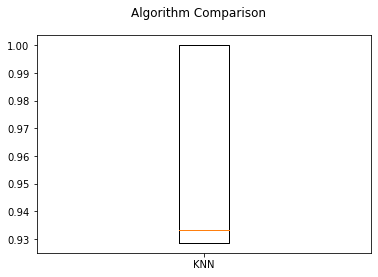

In [16]:
from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# There is a population of accuracy measures for each algorithm (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that k-nearest neighbors (KNN) algorithm has the larg accuracy score but its mean is skewed to the left.

Apply parameters optimization and evaluate the performance KNN Classification (applying parameters optimization)

In [17]:
# KNN Classification, apply Grid Search Parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
parameters_k = {"n_neighbors": range(1, 25)}
gridsearch_knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose=1, cv = 10, n_jobs=-1)
gridsearch_knn.fit(X_train_scaled, y_train)

print(gridsearch_knn.best_params_)
 
# Testing the model using X_test and storing the output in y_pred
y_pred_pknn = gridsearch_knn.predict(X_test_scaled)
y_pred_pknn

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'n_neighbors': 6}


array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [18]:
# Quantitative evaluation of the model quality on the test set.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_pknn))
score_pknn = accuracy_score(y_test, y_pred_pknn)
print("accuracy score: %0.3f" % score_pknn)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pknn))

# Creating  a confusion matrix,which compares the y_test and y_pred_pknn
from sklearn.metrics import confusion_matrix
cm_pknn = confusion_matrix(y_test, y_pred_pknn)
cm_pknn

0.9722222222222222
accuracy score: 0.972
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  6]], dtype=int64)

We have got little improvement of 97 % accuracy by applying grid search parameter optimization which is good enough result.

# 2. Classification Using Gaussian Naive Bayes Machine Learning Algorithm

Splitting Dataset (Train/Test)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
# Feature Scaling (Normalizing Data)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
scaled_features = scaler.transform(X)

Applying Gaussian Naive Bayes Algorithm and Evaluating

In [21]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(X_train, y_train)
predictions = GB.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9166666666666666
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



We have got 92 % accuracy which is good, we can even improve it using the Hyperparameter Tuning technique which is what we are going to apply next.

In [22]:
# Hyperparameter Tuning

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

#Fitting 5 folds 
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=4.328761281083053e-06)


GaussianNB(var_smoothing=1.0)

In [24]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 3 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]] : is the confusion matrix
0.9722222222222222 : is the accuracy score


Discussion: The first time we run the Gaussian Naive Bayes Algorithm we got an accuracy score of 91%. We then did the hyperparameter optimization using grid search cross validation technique. After running the optimization process we now get an accuracy score of 97% which is excelent. The algoritm missed just one sample in class 2 other than that all the classification were perfect.

Visualization

In [26]:
# Using Principal Component Analysis (PCA) for exploratory data analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [27]:
pc = pca.fit_transform(X)

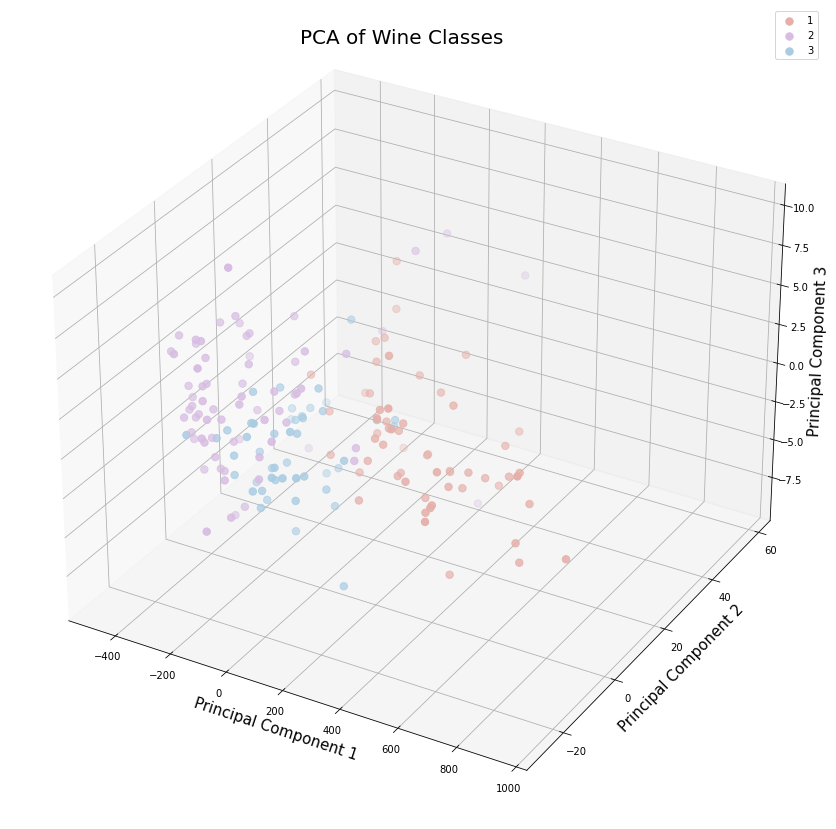

In [28]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
targets = data.Classes.unique()
colors = ['#E6B0AA','#D7BDE2','#A9CCE3']
for target, color in zip(targets, colors):
    indicesToKeep = (Y == target)
    pc1 = pc[indicesToKeep].T[0]
    pc2 = pc[indicesToKeep].T[1]
    pc3 = pc[indicesToKeep].T[2]
    ax.scatter3D(pc1, pc2,pc3, c=color, s=55)
ax.legend(targets)
plt.suptitle('PCA of Wine Classes', y=0.86, fontsize=20)
plt.show();

Aggregate Metrics Summary

Text(0.5, 1.0, 'Wine Data Summary')

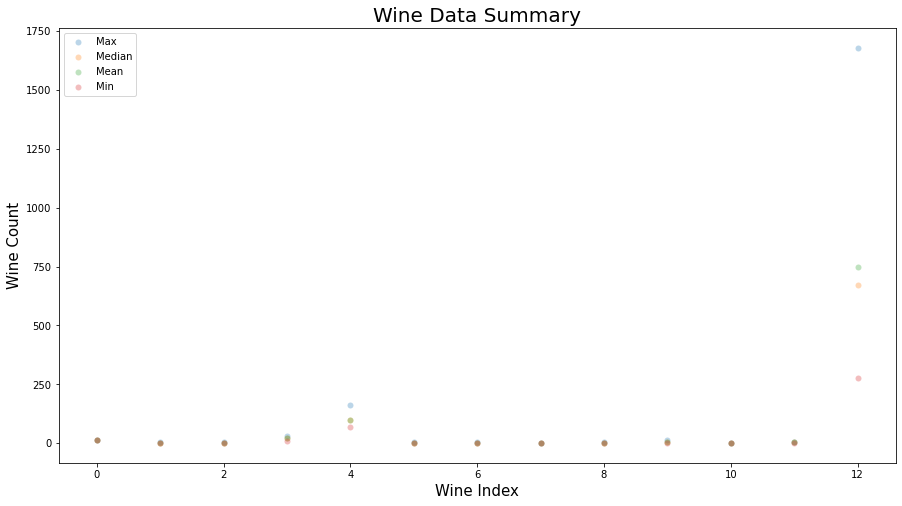

In [29]:
maxs=list(X.max(axis=0))
mins=list(X.min(axis=0))
means=list(X.mean(axis=0))
median=list(X.median(axis=0))
cols=list(X.columns)

summary_df=pd.DataFrame({"Wine":cols,"Max":maxs,"Median":median,"Mean":means,"Min":mins})
summary_df=summary_df.reset_index(drop=True)

fig=plt.gcf()
fig.set_size_inches(15, 8)

sns.scatterplot(x=summary_df.index,y='Max',data=summary_df,linewidth=0,alpha=0.3,label='Max')
sns.scatterplot(x=summary_df.index,y='Median',data=summary_df,linewidth=0,alpha=0.3,label='Median')
sns.scatterplot(x=summary_df.index,y='Mean',data=summary_df,linewidth=0,alpha=0.3,label='Mean')
sns.scatterplot(x=summary_df.index,y='Min',data=summary_df,linewidth=0,alpha=0.3,label='Min')
plt.legend(loc="upper left")
plt.xlabel("Wine Index",fontsize=15)
plt.ylabel("Wine Count",fontsize=15)
plt.title("Wine Data Summary",fontsize=20)

# 3. Classification Using the Decision Tree Machine Learning algorithm

Importing Packages and Loading Libraries

In [30]:
# All necessary Imports
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import export_graphviz
import graphviz

In [31]:
from time import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns; sns.set() 
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
# replacing values

data['Classes'].replace([1,2,3],['Class1', 'Class2', 'Class3'], inplace=True)

In [33]:
# Obtain the class distribution
data.Classes.value_counts()

Class2    71
Class1    59
Class3    48
Name: Classes, dtype: int64

Identify features and labels

In [34]:
X = data.drop(['Classes'], axis=1)
y = data['Classes'].values
print(X.shape)
print(y.shape)

(178, 13)
(178,)


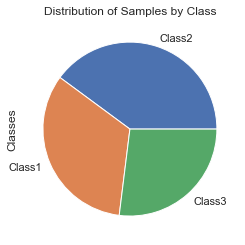

In [35]:
data['Classes'].value_counts().plot(kind='pie', title='Distribution of Samples by Class');

As we can see overhere we have imbalance problem, we are going to use upsampling technique to solve the issue.

In [36]:
from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='71'

data_class1 = resample(data[data['Classes']=='Class1'],
               replace=True,
               n_samples=71,
               random_state=123)

data_class2 = resample(data[data['Classes']=='Class2'],
               replace=True,
               n_samples=71,
               random_state=123)

data_class3 = resample(data[data['Classes']=='Class3'],
               replace=True,
               n_samples=71,
               random_state=123)

data_upsampled = pd.concat([data_class1, data_class2, data_class3])


# Display new class counts

data_upsampled.Classes.value_counts()

Class1    71
Class2    71
Class3    71
Name: Classes, dtype: int64

In [37]:
X = data_upsampled.drop(['Classes'], axis=1)
y = data_upsampled['Classes'].values
print(X.shape)
print(y.shape)

(213, 13)
(213,)


Splitting Train/Test Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 15 nodes with maximum depth 4.
Model Accuracy: 1.0


In [41]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Class1       0.88      1.00      0.93        14
      Class2       1.00      0.90      0.95        20
      Class3       1.00      1.00      1.00        20

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



Here, from the visualizing the unseen data of decision tree we see that the accuracy for the given data is 94% which is good enough. This prediction is before optimizing the data, now next we will optimize the data and check the result.

In [42]:
param_grid = { 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [2, 20, 50,70], 
               'max_leaf_nodes': [5, 9, 15, 21, 27]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [5, 9, 15, 21, 27],
                         'min_samples_leaf': [2, 20, 50, 70]})

In [43]:
print(f'The best model is: \n{gs_dt.best_estimator_}')

The best model is: 
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=9, min_samples_leaf=2)


In [44]:
tree_opt = gs_dt.best_estimator_
print(f'Decision tree has {tree_opt.tree_.node_count} nodes with maximum depth {tree_opt.tree_.max_depth}.') 
print(f'Model Accuracy: {tree_opt.score(X_train, y_train)}')

Decision tree has 13 nodes with maximum depth 3.
Model Accuracy: 0.9874213836477987


In [45]:
y_pred = tree_opt.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Class1       0.87      0.93      0.90        14
      Class2       0.95      0.90      0.92        20
      Class3       1.00      1.00      1.00        20

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



We have got 94 % accuracy with optimization using just 9 nodes and maximum depth of 3 which is almost the same without optimization when we got 94 % but with using 15 nodes and maximum depth of 4 which we concedered as good improvement. 

# 4. Classification using Suport_Vector_Machines Machine Learning Algorithm

In [46]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, predicted_labels)

In [47]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Classes classification accuracy = %f' % accuracy(conf))

Classes classification accuracy = 0.740741


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7407407407407407
F1 score: 0.7395711500974658
Recall: 0.7407407407407407
Precision: 0.7417695473251029

 clasification report:
               precision    recall  f1-score   support

      Class1       0.75      0.86      0.80        14
      Class2       0.78      0.70      0.74        20
      Class3       0.70      0.70      0.70        20

    accuracy                           0.74        54
   macro avg       0.74      0.75      0.75        54
weighted avg       0.74      0.74      0.74        54


 confussion matrix:
 [[12  0  2]
 [ 2 14  4]
 [ 2  4 14]]


Without specifying the parameters "C" and "Gamma" in order to control the training and CV errors we have got 74 % classification accurancy. So, in order to optimize this classification performance we need to find the best values of the parameters C and Gamma by selecting the least errors values out of a range of values for both "C" and "Gamma"

Parameter Optimization

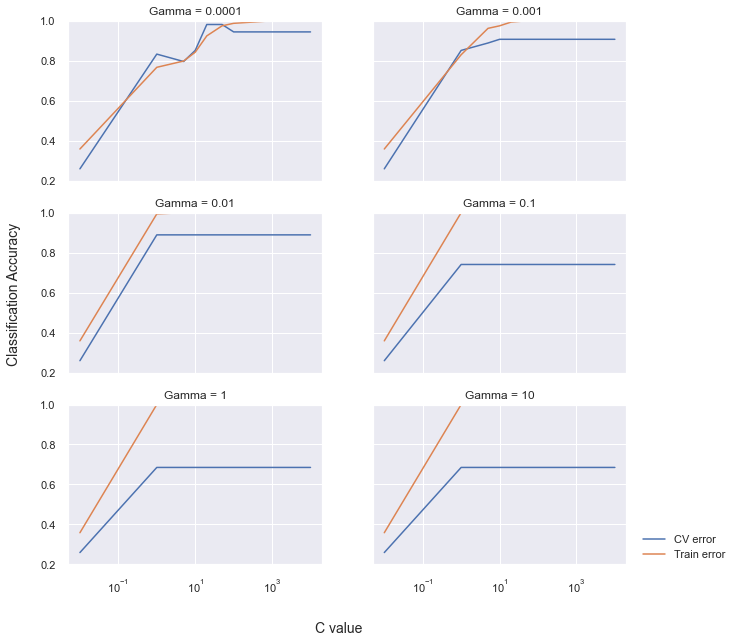

In [49]:
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2,
                             sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0

    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)

            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
            
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
        
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
        
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
                      rotation='vertical', fontsize=14)

With putting the "C" and "Gamma" in ranges to let the model show us in graphics which are the best paramaters values of "C" and "Gamma" in order to obtain better classification performance.

As we can see from the plots we would use "C" = 100 and "Gamma" = 0.0001

In [50]:
clf = svm.SVC(C=100, gamma=0.0001)
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized Classes classification accuracy = %.2f' % accuracy(cv_conf))

Optimized Classes classification accuracy = 0.94


In [51]:
predicted_labels_rbf = clf.predict(X_test)

conf_rbf = confusion_matrix(y_test, predicted_labels_rbf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels_rbf))
print ('F1 score:', f1_score(y_test, predicted_labels_rbf,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels_rbf,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels_rbf,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels_rbf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels_rbf))

Accuracy: 0.9444444444444444
F1 score: 0.944690048138324
Recall: 0.9444444444444444
Precision: 0.9459389213775178

 clasification report:
               precision    recall  f1-score   support

      Class1       0.87      0.93      0.90        14
      Class2       0.95      0.90      0.92        20
      Class3       1.00      1.00      1.00        20

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54


 confussion matrix:
 [[13  1  0]
 [ 2 18  0]
 [ 0  0 20]]


As we can see without parameter optimization we had 74 % accuracy and after parameter optimization we have got 94 %, which is very good performance.

# 5. Classification Using The Multi-Layer Perceptron Mahine Learning Algorithm

Our data is already upsampled to 71 samples per class so we don't have imbalance problem here.

Here we are going to use the Atrtificial Neuronal Networks technique in order to estimate our classes classification. This technique is part of deep learning techniques and it is very popular for modeling and control the complex systems and it is widely used in Facial Recognition, Stock Market Prediction, Social Media, Signature Verification and Handwriting Analysis ...

In [52]:
clf = MLPClassifier(solver='lbfgs', alpha=.1,
                    hidden_layer_sizes=(3))
clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 25.926%
Classification accuracy = 0.259259
Accuracy: 0.25925925925925924
F1 score: 0.10675381263616558
Recall: 0.25925925925925924
Precision: 0.0672153635116598

 clasification report:
               precision    recall  f1-score   support

      Class1       0.26      1.00      0.41        14
      Class2       0.00      0.00      0.00        20
      Class3       0.00      0.00      0.00        20

    accuracy                           0.26        54
   macro avg       0.09      0.33      0.14        54
weighted avg       0.07      0.26      0.11        54


 confussion matrix:
 [[14  0  0]
 [20  0  0]
 [20  0  0]]


As we can see over here that with just 3 hidden layers we've got 96 % Classification accuracy and that because of the number of nodes (samples) in each layer, means if we increase the number of hidden layers we will have more nodes and that leads to more learning of the input data with minimizing the error because of the backpropagation and the least square error algorithms that will continuously keep optimizing our model performance.

In [53]:
clf = MLPClassifier(solver='lbfgs', alpha=.1,
                    hidden_layer_sizes=(7))
clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 96.296%
Classification accuracy = 0.962963
Accuracy: 0.9629629629629629
F1 score: 0.9629513816505687
Recall: 0.9629629629629629
Precision: 0.9638447971781305

 clasification report:
               precision    recall  f1-score   support

      Class1       0.93      0.93      0.93        14
      Class2       0.95      1.00      0.98        20
      Class3       1.00      0.95      0.97        20

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


 confussion matrix:
 [[13  1  0]
 [ 0 20  0]
 [ 1  0 19]]


As we can see over here that with just 7 hidden layers we've got 98 % Classification accuracy which is excellent.

# 6. Classification using Auto Machine Learning Algorithm (Pycaret)

In purpose of exploratory analysis we are going to plot the graphs by comparing several features of each class with the wine's Magnesium.

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualisation 
import matplotlib.pyplot as plt # Data visualisation 

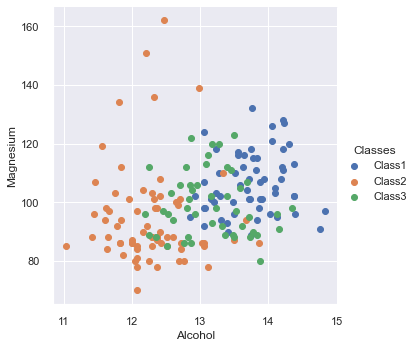

In [55]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Alcohol','Magnesium').add_legend()

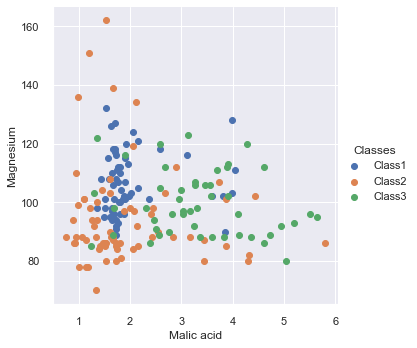

In [56]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Malic acid','Magnesium').add_legend()

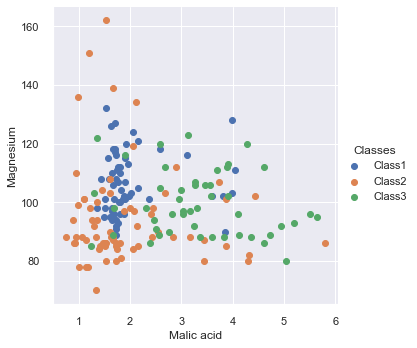

In [57]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Malic acid','Magnesium').add_legend()

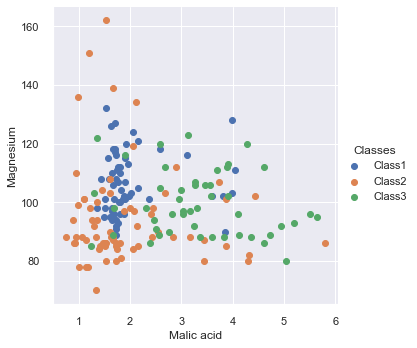

In [58]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Malic acid','Magnesium').add_legend()

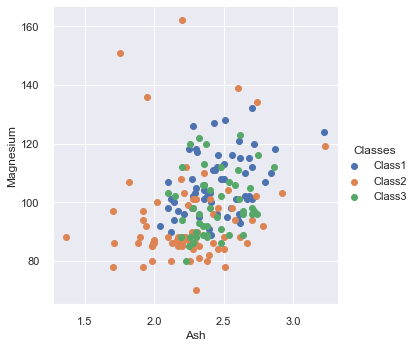

In [59]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Ash','Magnesium').add_legend()

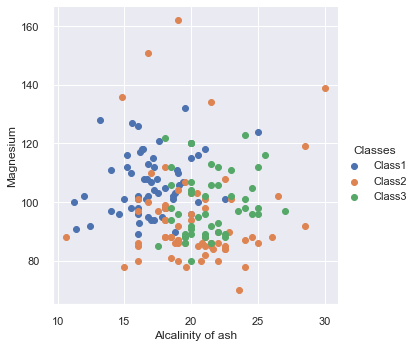

In [60]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Alcalinity of ash','Magnesium').add_legend()

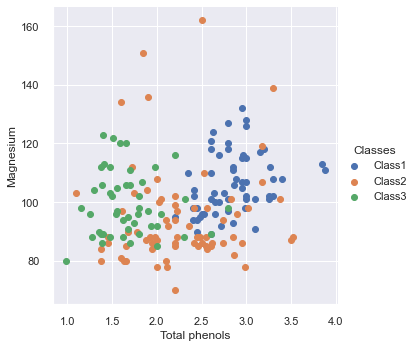

In [61]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Total phenols','Magnesium').add_legend()

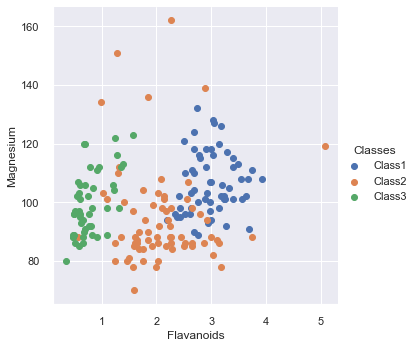

In [62]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Flavanoids','Magnesium').add_legend()

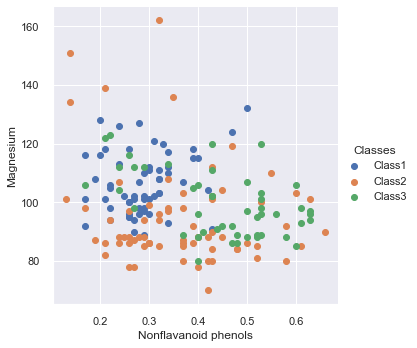

In [63]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Nonflavanoid phenols','Magnesium').add_legend()

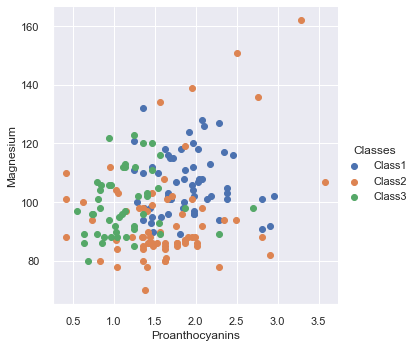

In [64]:
sns.FacetGrid(data,hue='Classes',size=5).map(plt.scatter,'Proanthocyanins','Magnesium').add_legend()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classes                       178 non-null    object 
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

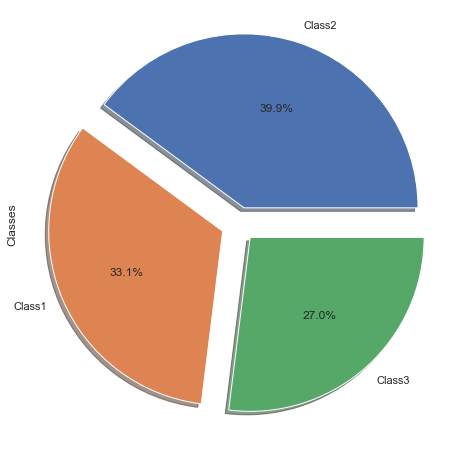

In [66]:
data['Classes'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

As we can see overhere we have imbalance problem, we are going to use upsampling technique to solve the issue.

In [67]:
from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='71'

data_class1 = resample(data[data['Classes']=='Class1'],
               replace=True,
               n_samples=71,
               random_state=123)

data_class2 = resample(data[data['Classes']=='Class2'],
               replace=True,
               n_samples=71,
               random_state=123)

data_class3 = resample(data[data['Classes']=='Class3'],
               replace=True,
               n_samples=71,
               random_state=123)

data = pd.concat([data_class1, data_class2, data_class3])


# Display new class counts

data.Classes.value_counts()

Class1    71
Class2    71
Class3    71
Name: Classes, dtype: int64

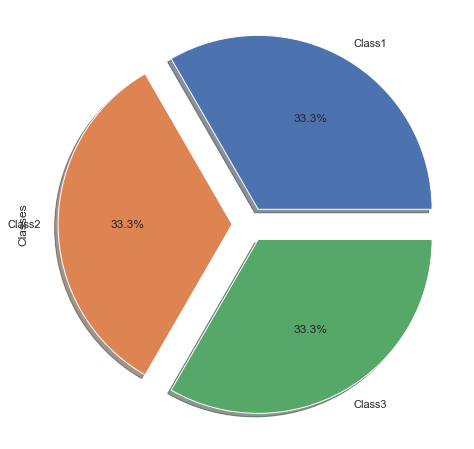

In [68]:
data['Classes'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Preparing the data for model selection. 
95% of the data is for training and testing, 5% of the data is the unseen data for prediction.

In [69]:
data = data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data.sample(frac=0.05, random_state=786).reset_index(drop=True)

In [70]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (202, 14)
Unseen Data For Predictions (10, 14)


In [71]:
data['Classes'].value_counts()

Class1    68
Class2    67
Class3    67
Name: Classes, dtype: int64

In [72]:
# Importing pycaret classification method

from pycaret.classification import *

In [73]:
exp = setup(data = data, target = 'Classes', fold_shuffle=True, session_id=77)

,Description,Value
0,session_id,77
1,Target,Classes
2,Target Type,Multiclass
3,Label Encoded,"Class1: 0, Class2: 1, Class3: 2"
4,Original Data,"(202, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [74]:
# Comparing the models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9933,1.0000,0.9933,0.9944,0.9933,0.9900,0.9906,0.0190
rf,Random Forest Classifier,0.9929,1.0000,0.9933,0.9940,0.9928,0.9892,0.9899,0.2560
ridge,Ridge Classifier,0.9857,0.0000,0.9867,0.9883,0.9856,0.9785,0.9799,0.0200
et,Extra Trees Classifier,0.9790,1.0000,0.9800,0.9842,0.9784,0.9685,0.9716,0.2430
catboost,CatBoost Classifier,0.9790,1.0000,0.9800,0.9825,0.9788,0.9685,0.9705,3.6980
lr,Logistic Regression,0.9786,0.9976,0.9800,0.9821,0.9784,0.9677,0.9698,2.4560
nb,Naive Bayes,0.9786,0.9976,0.9800,0.9838,0.9779,0.9677,0.9709,0.0200
lightgbm,Light Gradient Boosting Machine,0.9786,1.0000,0.9800,0.9826,0.9785,0.9679,0.9699,1.1630
qda,Quadratic Discriminant Analysis,0.9724,0.9968,0.9733,0.9786,0.9717,0.9585,0.9621,0.0250
xgboost,Extreme Gradient Boosting,0.9719,1.0000,0.9733,0.9768,0.9717,0.9578,0.9605,0.2070


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In the above table we can see many models with an excelent accuracy. In this project we have used K-Nearest Neighbors classifier, Naive Bayes, Decision Tree classifier, SVM-Linear Kernel, The Multi-Layer Perceptron (MLP) and finaly the auto machine leaning. So from the above table we are going to try the Extra Trees Classifier since it is showing a perfect accurancy. Let's see whether it will match the machine learning outcome or not.  

In [75]:
# With this command we are creating a Extra Trees model
# The code for Naives Byes is " et "
et_model = create_model('et', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,1.0000,0.9333,0.9444,0.9327,0.9000,0.9061
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8571,1.0000,0.8667,0.8980,0.8512,0.7846,0.8099
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Indeed it is showing exactly the same auto maching learning outputs.

Now tuning of the hyper parameters.

Tuning the hyper parameters will be useful to increase the accuracy and other features. For unbalanced datasets we mainly look F1 score, as our datasets our balanced we can use the accuracy.

In [79]:
et_tuned = tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,1.0000,0.9333,0.9444,0.9327,0.9000,0.9061
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9286,0.9841,0.9333,0.9405,0.9278,0.8923,0.8993
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Plotting the ROC Curves, As the curve moves towards the x and y axis, the performance is increased.

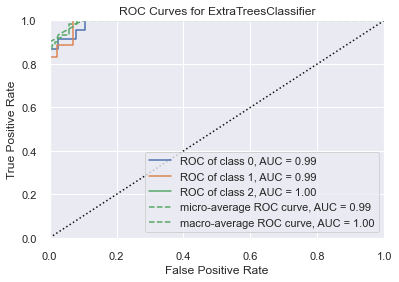

In [81]:
plot_model(et_tuned, plot = 'auc')

Confusion Matrix

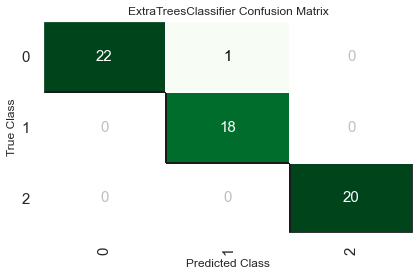

In [82]:
plot_model(et_model, plot = 'confusion_matrix')

Predicting the accuracy using the test datasets

In [84]:
predict_model(et_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9180,0.9939,0.9155,0.9169,0.9171,0.8763,0.8767


Checking with the unseen data

Initially we separated a part of the datasets as unseen data set for checking the final developed model. Below we are checking this. The result is a data frame with Label and the score(last two columns). Where the label is the predicted label and score is how much percentage does the machine think of having an accuracy.

In [85]:
new_prediction = predict_model(et_model, data=data_unseen)

In [86]:
new_prediction

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Label,Score
0,Class1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990,Class1,0.78
1,Class2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,Class2,1.00
2,Class3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,Class3,1.00
3,Class2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,Class2,1.00
4,Class3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,Class3,1.00
5,Class1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915,Class1,1.00
6,Class2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,Class2,1.00
7,Class1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,Class1,1.00
8,Class2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,Class2,1.00
9,Class3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520,Class3,1.00


Discussion

As we can see above, we got a high accuracy model with 100% accuracy for most of the iterations, with no over fitting. Auto Ml is preferred more because it’s less time consuming and gives a very good result. In our case we did not use the hyper parameter tuning because our accuracy before tuning was 100 % which is perfect however the hyper parameter tuning is not that easy for the less experienced people, but it makes a huge difference in the performance of the model when we have unexpected random misclassification issues.

Best regards,
Charaf Lachouri